In [21]:
import sys
sys.path.insert(0, '../')
from registrationNN.models import model_visualizer
from utils.ObjectUtil import ObjectUtil
import numpy as np
from utils.RegistrationUtils import RegistrationUtils
from utils.ObjectUtil import ObjectUtil
import numpy as np
from lapjv import lapjv
from utils.RegistrationUtils import RegistrationUtils
from sketch_object.UnlabeledObject import UnlabeledObject
import copy
from sketch_object.Stroke import Stroke
from animator.SketchAnimation import SketchAnimation
import pickle5 as pickle
import os

from utils.Config import Config
from utils.ObjectUtil import ObjectUtil
from tools.FeedbackGenerator import VideoGenerator
from registrationNN.models import NNModel
import time
import matplotlib.pyplot as plt
from sketch_object.Point import Point

In [22]:
%load_ext autoreload

%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
model_tag = 'generative_video_exp1' # deep learning model to use for alignment
question_name = 'ReflectionQuestion'
org_sketch_id = '2_cd887e29-8029-4b13-bd01-65c78a6b17bf'
tar_sketch_id = '2_b49071f4-14e5-47c9-9d42-c987a07fcec4'

config = Config.default_video_config(question_name, org_sketch_id, tar_sketch_id)
config.vis_video = True
config.load_trans_params = False
config.fine_tune_epochs = 200
config.verbose = 1

model_params = Config.default_model_config(model_tag)
model_params.load = False
model_params.load_ckpt = False
model_params.save = False
model_params.save_ckpt = False
model_params.learning_rate = 0.01

In [116]:
# load original and target sketch 
org_sketch, org_labels = ObjectUtil.xml_to_UnlabeledObjects(config.org_sketch_path, 
                                                            mn_len=config.mn_len, 
                                                            re_sampling=config.re_sampling, 
                                                            flip=config.org_flip, 
                                                            shift_x=config.org_shift_x,
                                                             shift_y=config.org_shift_y)

tar_sketch, tar_labels = ObjectUtil.xml_to_UnlabeledObjects(config.tar_sketch_path, 
                                                            mn_len=config.mn_len, 
                                                            re_sampling=config.re_sampling, 
                                                            flip=config.tar_flip, 
                                                            shift_x=config.tar_shift_x,
                                                             shift_y=config.tar_shift_y)

In [117]:
tar_labels

['Digit_Word',
 'Two Arrows Horizontal',
 'Rectangle',
 'Parallelogram Right',
 'Digit_Word',
 'Trapezoid Down',
 'Two Arrows Vertical',
 'Digit_Word',
 'Two Arrows Horizontal',
 'Rectangle',
 'Parallelogram Right',
 'Digit_Word',
 'Trapezoid Down',
 'Two Arrows Vertical']

In [118]:
tar_sketch, tar_labels = tar_sketch[:7], tar_labels[:7]

In [119]:
org_labels

['Trapezoid Down',
 'Two Arrows Vertical',
 'Square',
 'Parallelogram Right',
 'Two Arrows Vertical',
 'Trapezoid Down',
 'Two Arrows Vertical',
 'Square',
 'Parallelogram Right',
 'Two Arrows Vertical']

In [120]:
org_sketch, org_labels = org_sketch[:5], org_labels[:5]

<IPython.core.display.Javascript object>


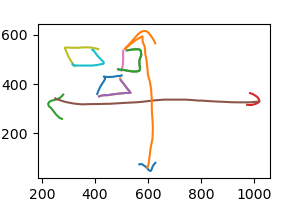

In [121]:
fig, ax = plt.subplots(figsize=(3, 2))
for obj in org_sketch:
    obj.visualize(ax=ax, show=False)

<IPython.core.display.Javascript object>


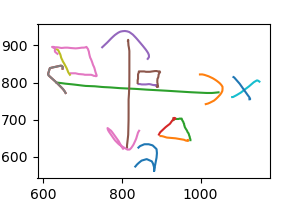

In [122]:
fig, ax = plt.subplots(figsize=(3, 2))
for obj in tar_sketch:
    obj.visualize(ax=ax, show=False)

In [145]:
alignment_model = NNModel(model_params)

Devices: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8703665784136630909
]
length of original sketchs:1
[models.py] Tue Aug 31 16:49:40 2021: finshed loading the data
Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 495.1559
Epoch 2/400
1/1 [==============================] - 0s 32ms/step - loss: 111719.2344
Epoch 3/400
1/1 [==============================] - 0s 33ms/step - loss: 19683.4414
Epoch 4/400
1/1 [==============================] - 0s 33ms/step - loss: 5214.6221
Epoch 5/400
1/1 [==============================] - 0s 32ms/step - loss: 6565.8301
Epoch 6/400
1/1 [==============================] - 0s 32ms/step - loss: 21892.2324
Epoch 7/400
1/1 [==============================] - 0s 31ms/step - loss: 14213.8379
Epoch 8/400
1/1 [==============================] - 0s 32ms/step - loss: 4550.0513
Epoch 9/400
1/1 [==============================] - 0s 31ms/step - loss: 4405.1753
Epoch 10/400
1/1 [===========================

Epoch 98/400
1/1 [==============================] - 0s 30ms/step - loss: 248.5187
Epoch 99/400
1/1 [==============================] - 0s 29ms/step - loss: 245.5215
Epoch 100/400
1/1 [==============================] - 0s 29ms/step - loss: 242.4629
Epoch 101/400
1/1 [==============================] - 0s 31ms/step - loss: 238.8763
Epoch 102/400
1/1 [==============================] - 0s 32ms/step - loss: 234.8478
Epoch 103/400
1/1 [==============================] - 0s 32ms/step - loss: 230.9023
Epoch 104/400
1/1 [==============================] - 0s 32ms/step - loss: 227.0737
Epoch 105/400
1/1 [==============================] - 0s 31ms/step - loss: 223.2892
Epoch 106/400
1/1 [==============================] - 0s 32ms/step - loss: 219.3807
Epoch 107/400
1/1 [==============================] - 0s 32ms/step - loss: 215.4527
Epoch 108/400
1/1 [==============================] - 0s 33ms/step - loss: 211.4003
Epoch 109/400
1/1 [==============================] - 0s 32ms/step - loss: 207.6384
Epoch 

1/1 [==============================] - 0s 31ms/step - loss: 95.3591
Epoch 198/400
1/1 [==============================] - 0s 33ms/step - loss: 95.3517
Epoch 199/400
1/1 [==============================] - 0s 33ms/step - loss: 95.3405
Epoch 200/400
1/1 [==============================] - 0s 34ms/step - loss: 95.3234
Epoch 201/400
1/1 [==============================] - 0s 34ms/step - loss: 95.3156
Epoch 202/400
1/1 [==============================] - 0s 33ms/step - loss: 95.3013
Epoch 203/400
1/1 [==============================] - 0s 33ms/step - loss: 95.2950
Epoch 204/400
1/1 [==============================] - 0s 32ms/step - loss: 95.2872
Epoch 205/400
1/1 [==============================] - 0s 32ms/step - loss: 95.2737
Epoch 206/400
1/1 [==============================] - 0s 32ms/step - loss: 95.2648
Epoch 207/400
1/1 [==============================] - 0s 33ms/step - loss: 95.2516
Epoch 208/400
1/1 [==============================] - 0s 32ms/step - loss: 95.2442
Epoch 209/400
1/1 [===========

1/1 [==============================] - 0s 32ms/step - loss: 94.4721
Epoch 298/400
1/1 [==============================] - 0s 32ms/step - loss: 94.4495
Epoch 299/400
1/1 [==============================] - 0s 30ms/step - loss: 94.4370
Epoch 300/400
1/1 [==============================] - 0s 30ms/step - loss: 94.4326
Epoch 301/400
1/1 [==============================] - 0s 31ms/step - loss: 94.4284
Epoch 302/400
1/1 [==============================] - 0s 31ms/step - loss: 94.4230
Epoch 303/400
1/1 [==============================] - 0s 32ms/step - loss: 94.4017
Epoch 304/400
1/1 [==============================] - 0s 31ms/step - loss: 94.4010
Epoch 305/400
1/1 [==============================] - 0s 32ms/step - loss: 94.3984
Epoch 306/400
1/1 [==============================] - 0s 32ms/step - loss: 94.3910
Epoch 307/400
1/1 [==============================] - 0s 32ms/step - loss: 94.3762
Epoch 308/400
1/1 [==============================] - 0s 32ms/step - loss: 94.3644
Epoch 309/400
1/1 [===========

1/1 [==============================] - 0s 33ms/step - loss: 93.7604
Epoch 398/400
1/1 [==============================] - 0s 33ms/step - loss: 93.7529
Epoch 399/400
1/1 [==============================] - 0s 34ms/step - loss: 93.7420
Epoch 400/400
1/1 [==============================] - 0s 31ms/step - loss: 93.7327


<IPython.core.display.Javascript object>


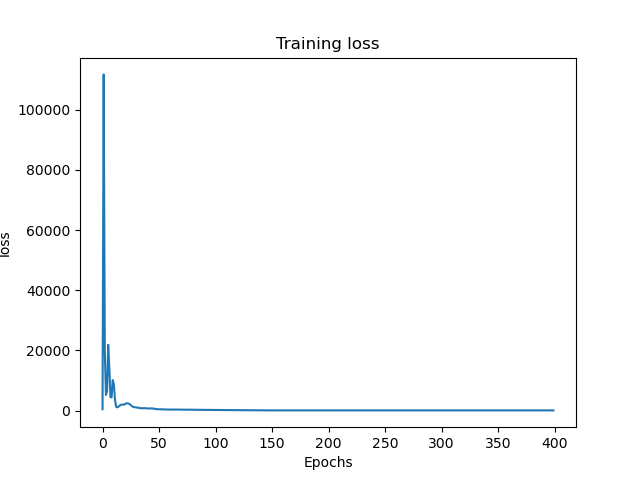

In [146]:
alignment_model.fit(org_objs[2:3], tar_objs[3:4], [], [])

In [58]:
alignment_model.predict(org_objs[2:3], tar_objs[3:4])

(array([[ 0.8738356 , -1.3783134 ,  1.789013  , -0.02240372, -0.17006296,
         11.072169  , 10.23083   ]], dtype=float32),
 array([6.56084978]))

In [47]:
generator = VideoGenerator(alignment_model, config)

In [48]:
n, m = len(org_sketch), len(tar_sketch)

if config.load_trans_params and os.path.exists(os.path.join(config.video_dir, 'transformation_parameters.pkl')):
    with open(os.path.join(config.video_dir, 'transformation_parameters.pkl'), 'rb') as f:
        final_params = pickle.load(f)

    if config.verbose > 2:
        print(f'[VideoGenerator] info: final transformation params: {final_params}')

else:
    # prepare pair-wise set
    org_objs, tar_objs = [], []
    for obj1 in org_sketch:
        for obj2 in tar_sketch:
            org_objs.append(obj1.get_copy())
            tar_objs.append(obj2.get_copy())


    alignment_model.fine_tune(org_objs, tar_objs, 200)

    trans_params, losses = alignment_model.predict(org_objs, tar_objs) # trans_params(N * M, 7)
    trans_params = np.reshape(trans_params, (n, m, 7))
    losses = np.reshape(losses, (n, m))
    
    print(n, m)
    final_params = generator.optimal_transformation(org_sketch, tar_sketch, losses, trans_params) # note: new objects might be added to org_sketch
    if config.verbose > 2:
        print(f'[VideoGenerator] info: pair-wise transformation parameters: {trans_params}')
        print(f'[VideoGenerator] info: pair-wise disimilarity: {losses}')
        print(f'[VideoGenerator] info: final transformation params: {final_params}')

    # save final params in a pickle file 
    with open(os.path.join(config.video_dir, 'transformation_parameters.pkl'), 'wb') as f:
        pickle.dump(final_params, f)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 101.0508
Epoch 2/200
1/1 [==============================] - 0s 99ms/step - loss: 55.9795
Epoch 3/200
1/1 [==============================] - 0s 104ms/step - loss: 137.0819
Epoch 4/200
1/1 [==============================] - 0s 97ms/step - loss: 22.2498
Epoch 5/200
1/1 [==============================] - 0s 120ms/step - loss: 150.7805
Epoch 6/200
1/1 [==============================] - 0s 88ms/step - loss: 57.8461
Epoch 7/200
1/1 [==============================] - 0s 88ms/step - loss: 36.0080
Epoch 8/200
1/1 [==============================] - 0s 89ms/step - loss: 28.9616
Epoch 9/200
1/1 [==============================] - 0s 92ms/step - loss: 24.3456
Epoch 10/200
1/1 [==============================] - 0s 99ms/step - loss: 26.9268
Epoch 11/200
1/1 [==============================] - 0s 92ms/step - loss: 25.6332
Epoch 12/200
1/1 [==============================] - 0s 92ms/step - loss: 22.9682
Epoch 13/200
1/1 [================

1/1 [==============================] - 0s 101ms/step - loss: 16.2562
Epoch 102/200
1/1 [==============================] - 0s 102ms/step - loss: 16.2514
Epoch 103/200
1/1 [==============================] - 0s 97ms/step - loss: 16.2486
Epoch 104/200
1/1 [==============================] - 0s 106ms/step - loss: 16.2452
Epoch 105/200
1/1 [==============================] - 0s 113ms/step - loss: 16.2411
Epoch 106/200
1/1 [==============================] - 0s 104ms/step - loss: 16.2374
Epoch 107/200
1/1 [==============================] - 0s 107ms/step - loss: 16.2336
Epoch 108/200
1/1 [==============================] - 0s 108ms/step - loss: 16.2296
Epoch 109/200
1/1 [==============================] - 0s 109ms/step - loss: 16.2257
Epoch 110/200
1/1 [==============================] - 0s 107ms/step - loss: 16.2218
Epoch 111/200
1/1 [==============================] - 0s 113ms/step - loss: 16.2177
Epoch 112/200
1/1 [==============================] - 0s 107ms/step - loss: 16.2135
Epoch 113/200
1/1 [

1/1 [==============================] - 0s 104ms/step - loss: 14.3448
5 7
Original assignment: [5 6 2 3 4 0 1]
Matched objects losses: [7.255044311678595, 6.5881238932463315, 5.4131022969610925, 10.151135033588632, 16.52804879461625, 1000000007.0, 1000000007.0]
Total alignment cost: (2000000000.0, array([0.0000000e+00, 4.6288671e+00, 2.8778152e+00, 5.7187748e-01,
       5.8886166e+00, 1.0000000e+09, 1.0000000e+09], dtype=float32), array([13.563258  ,  0.63545847,  2.535287  ,  9.579258  , 10.639433  ,
        7.2550445 ,  1.9592566 ], dtype=float32))


In [79]:
print(f'[VideoGenerator] info: pair-wise disimilarity: {losses}')

[VideoGenerator] info: pair-wise disimilarity: [[13.50888623 10.71565255 10.11698076 15.04417655 11.72813336  6.9405724
  19.27692   ]
 [23.93181922  4.65125994 15.81807254 28.52156938 16.9310583  15.13572575
  26.698503  ]
 [11.67780492 16.50386085  8.41536747 10.32095074 13.60770909  8.55397418
  18.30146339]
 [15.51022357  9.50468483 11.1508655  15.59561838 12.82348153  8.42096758
  22.93337591]
 [21.37010128 36.03258211 22.47787154 16.60930192 15.74422908 24.03243425
   4.67418608]
 [ 3.93579449 25.21500623 15.44355596 11.7691014  11.28702324 12.795604
  19.78837198]
 [14.65510349 15.74913697  5.0977366  12.81900614 11.41436509  8.65140289
  21.66130988]]


In [55]:
if config.load_trans_params and os.path.exists(os.path.join(config.video_dir, 'transformation_parameters.pkl')):
    with open(os.path.join(config.video_dir, 'transformation_parameters.pkl'), 'rb') as f:
        final_params = pickle.load(f)

    if config.verbose > 2:
        print(f'[VideoGenerator] info: final transformation params: {final_params}')

else:   
    print(n, m)
    trans_params, losses = alignment_model.predict(org_objs, tar_objs) # trans_params(N * M, 7)
    trans_params = np.reshape(trans_params, (n, m, 7))
    losses = np.reshape(losses, (n, m))
    final_params = generator.optimal_transformation(org_sketch, tar_sketch, losses, trans_params) # note: new objects might be added to org_sketch
    if config.verbose > 2:
        print(f'[VideoGenerator] info: pair-wise transformation parameters: {trans_params}')
        print(f'[VideoGenerator] info: pair-wise disimilarity: {losses}')
        print(f'[VideoGenerator] info: final transformation params: {final_params}')

    # save final params in a pickle file 
    with open(os.path.join(config.video_dir, 'transformation_parameters.pkl'), 'wb') as f:
        pickle.dump(final_params, f)

5 7


IndexError: index 5 is out of bounds for axis 0 with size 5

In [143]:
org_labels, tar_labels

(['Parallelogram Right', 'Parallelogram Right', 'Parallelogram Right'],
 ['Digit_Word',
  'Two Arrows Vertical',
  'Digit_Word',
  'Square',
  'Trapezoid Down',
  'Two Arrows Horizontal'])

In [144]:
losses

array([[10.60644473,  2.94684925,  8.7032531 ,  8.08387267,  7.15105305,
         4.94085341],
       [11.70429854,  2.52154999, 10.13232374,  4.74191047,  5.69619051,
         1.85075809],
       [11.98865049,  2.49694833,  9.99277552,  5.44880173,  6.07234332,
         1.2334297 ]])

In [107]:
final_params

array([[ 1.00903869e+00,  1.23622215e+00, -1.53108269e-01,
         1.48758292e-03,  8.67656097e-02,  2.22665834e+00,
         1.30540073e-01],
       [ 9.91730809e-01,  6.31879747e-01, -1.26926452e-01,
         6.59403205e-03,  1.00895129e-01,  2.80991745e+00,
         2.23334551e-01],
       [ 1.04797900e+00,  1.28121722e+00, -4.62632999e-02,
         1.43911541e-02,  2.76645988e-01,  2.33903217e+00,
         2.85270333e-01],
       [ 1.00000000e+03,  1.00000000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+03,  1.00000000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+03,  1.00000000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [108]:
# fix and object in the target objects
cnt_ind = generator.get_widest_obj_ind(tar_sketch)
print(cnt_ind)
# normalize all transformation according to the transformation of the fixed object
a, b = final_params[cnt_ind][5], final_params[cnt_ind][5]
# for i in range(len(final_params)):
#     final_params[i][5] -= a
#     final_params[i][6] -= b

5


<IPython.core.display.Javascript object>


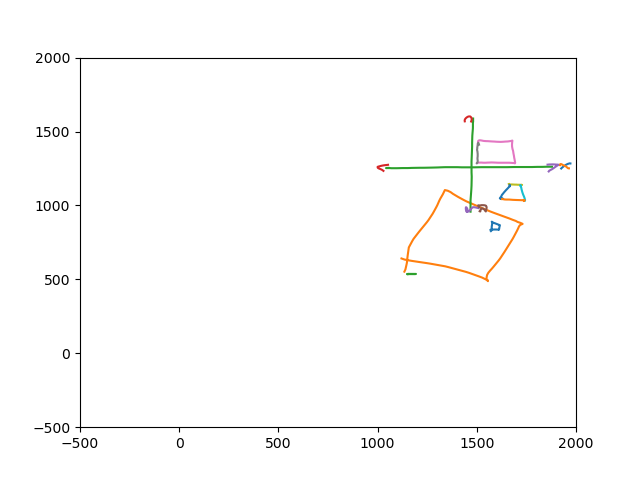

Before [ 1.21320105 -1.28276742  1.59388399 -0.45099983 -0.21058354  0.45765558
  2.83801579]
0.282916179836875
After [-3.43234205e-01  3.62915657e-01 -1.54770866e+00  0.00000000e+00
 -2.10583538e-01  1.61324004e+03  7.94488511e+02]
Before [ 0.90333372 -1.15448368  1.44369197  0.21080658 -0.19171205  1.0926646
  2.54594398]
3.496494539700052
After [-3.15850143e+00  4.03664587e+00 -1.69790068e+00  0.00000000e+00
 -1.91712052e-01  1.13935256e+03  5.15456931e+02]
Before [ 0.03879726 -1.36005318  1.57691169 -0.37473258 -0.28832579  0.16244707
  2.82636786]
0.23872380739739463
After [-9.26182946e-03  3.24677074e-01 -1.56468097e+00  0.00000000e+00
 -2.88325787e-01  1.20042668e+03  5.03503969e+02]
Before [1000. 1000.    0.    0.    0.    0.    0.]
3679.763689398729
After [3.67976369e+06 3.67976369e+06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19400000e+03 8.28000000e+02]
Before [1000. 1000.    0.    0.    0.    0.    0.]
196.92982960824438
After [196929.82960824 196929.82960824      0. 

In [152]:
# generate the video based on the final params
anim = SketchAnimation(org_sketch, tar_sketch)
anim.seq_animate_all(final_params, save=False, denormalize_trans=True)

In [147]:
# 2, 4, 5
a, b = 2, 3
p, l = alignment_model.predict(org_objs[a:a+1], tar_objs[b:b+1])
p, l = p[0], l[0]
org_obj, tar_obj = org_sketch[a].get_copy(), tar_sketch[b].get_copy()
print(org_labels[a], tar_labels[b])
t = RegistrationUtils.obtain_transformation_matrix(p)
t_denormalized = ObjectUtil.denormalized_transformation(org_obj, tar_obj, t)
org_obj.transform(t_denormalized, object_min_origin=True)
print("loss: ", l)

Square Parallelogram Right
1.3777777777777778
loss:  5.997286523071051


In [148]:
# tot = 0
# for p1 in org_obj.get_points():
#     mn = 1e9
#     for p2 in tar_obj.get_points():
#         mn = min(mn, Point.euclidean_distance(p1, p2))
#     tot += mn

# for p1 in tar_obj.get_points():
#     mn = 1e9
#     for p2 in org_obj.get_points():
#         mn = min(mn, Point.euclidean_distance(p1, p2))
#     tot += mn
# print(tot)

<IPython.core.display.Javascript object>


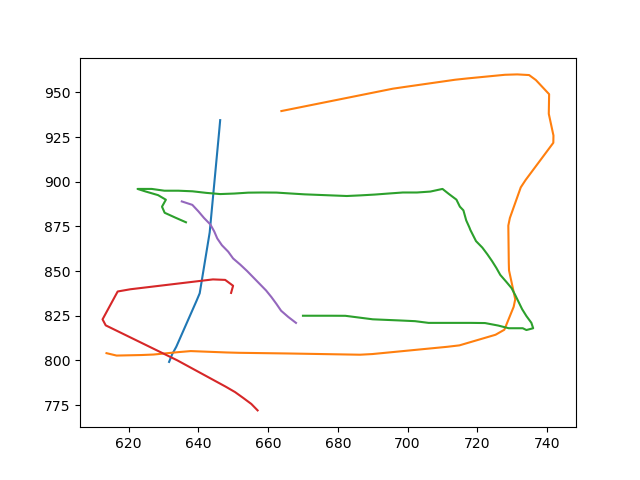

In [149]:
fig2, ax2 = plt.subplots()
org_obj.visualize(show=False, ax=ax2)
tar_obj.visualize(show=False, ax=ax2)

In [152]:
from registrationNN.models import RegisterTwoObjects

In [153]:
register = RegisterTwoObjects(org_obj, tar_obj)

In [156]:
register.optimize(params=False)

basinhopping step 0: f 1030.77
basinhopping step 1: f 34.8984 trial_f 34.8984 accepted 1  lowest_f 34.8984
found new global minimum on step 1 with function value 34.8984
basinhopping step 2: f 34.9267 trial_f 34.9267 accepted 1  lowest_f 34.8984
basinhopping step 3: f 34.8401 trial_f 34.8401 accepted 1  lowest_f 34.8401
found new global minimum on step 3 with function value 34.8401
basinhopping step 4: f 34.7363 trial_f 34.7363 accepted 1  lowest_f 34.7363
found new global minimum on step 4 with function value 34.7363
basinhopping step 5: f 34.8724 trial_f 34.8724 accepted 1  lowest_f 34.7363
basinhopping step 6: f 34.909 trial_f 34.909 accepted 1  lowest_f 34.7363
basinhopping step 7: f 34.9115 trial_f 34.9115 accepted 1  lowest_f 34.7363
basinhopping step 8: f 34.9061 trial_f 34.9061 accepted 1  lowest_f 34.7363
basinhopping step 9: f 34.9206 trial_f 34.9206 accepted 1  lowest_f 34.7363
basinhopping step 10: f 34.9968 trial_f 34.9968 accepted 1  lowest_f 34.7363
basinhopping step 11:

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


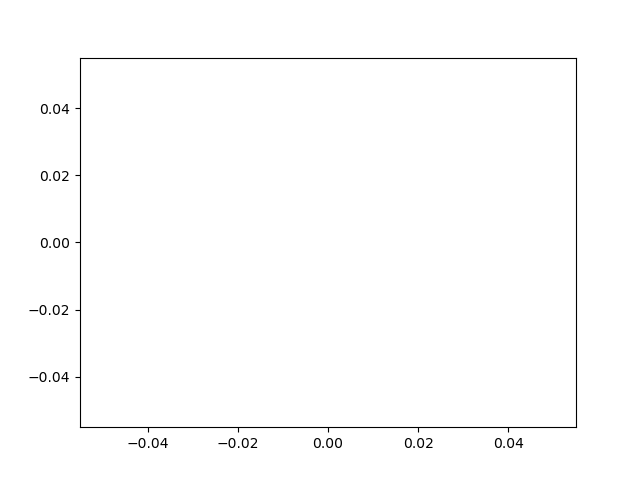

Before [0.10782389 1.48691726 1.97102165 0.81689262 0.0240031  2.61982036]


IndexError: index 6 is out of bounds for axis 0 with size 6

In [19]:
org_obj.reset()
obj1_seq = org_obj.get_copy()
animation = SketchAnimation([obj1_seq], [tar_obj]) 
animation.seq_animate_all([t], 
                         denormalize_trans=True,
                         save=False) 

<IPython.core.display.Javascript object>


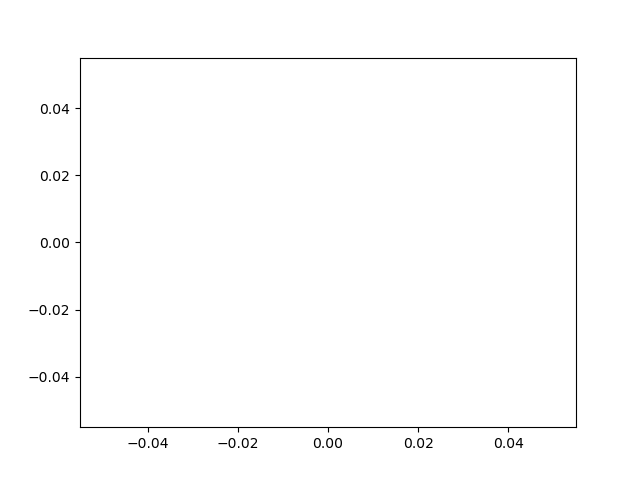

Before [[-8.93185198e-01 -8.25413048e-01 -3.25327277e+00 -1.57635808e-02
   1.08982608e-01  7.95383930e-01  9.21294594e+00]
 [-9.17694986e-01 -7.63193130e-01 -3.27688599e+00 -8.11071694e-03
   9.80733484e-02  8.26407492e-01  9.28569126e+00]
 [-8.95877779e-01 -8.19007576e-01 -3.25590014e+00 -1.49239451e-02
   1.08035326e-01  7.98214853e-01  9.22025204e+00]
 [-8.89989197e-01 -8.33318770e-01 -3.24994636e+00 -1.67022049e-02
   1.10478468e-01  7.91119993e-01  9.20243073e+00]
 [-8.86794031e-01 -8.41987312e-01 -3.24741530e+00 -1.78294033e-02
   1.11802243e-01  7.87410319e-01  9.19502544e+00]
 [-9.02433932e-01 -8.02103698e-01 -3.26210022e+00 -1.28517598e-02
   1.05045572e-01  8.06657434e-01  9.23956108e+00]
 [-8.93156588e-01 -8.25128853e-01 -3.25278044e+00 -1.56604499e-02
   1.09154664e-01  7.94887185e-01  9.21085644e+00]]


ValueError: setting an array element with a sequence.

In [87]:
c = 2
org_obj, tar_obj = org_sketch[c].get_copy(), tar_sketch[c].get_copy()
animation = SketchAnimation([org_obj], [tar_obj]) 
animation.seq_animate_all([trans_params[c]], 
                         denormalize_trans=True,
                         save=False) 

In [12]:
        
# fix and object in the target objects
cnt_ind = self.get_widest_obj_ind(tar_sketch)

# normalize all transformation according to the transformation of the fixed object
for i in range(len(final_params)):
    final_params[i][5] -= final_params[cnt_ind][5]
    final_params[i][6] -= final_params[cnt_ind][6]

if self.config.verbose > 3:
    model_visualizer.visualize_model(self.alignment_model, org_sketch, tar_sketch, org_sketch, tar_sketch, self.alignment_model.model_config)


if self.config.vis_video:
    # generate the video based on the final params
    anim = SketchAnimation(org_sketch, tar_sketch)
    anim.seq_animate_all(final_params, save=True, file=self.config.save_video_path, denormalize_trans=True)

NameError: name 'self' is not defined